<a href="https://colab.research.google.com/github/ParitoshP702/Skim_lit_pub_med/blob/main/Skim_Literature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.


In [2]:
!ls pubmed-rct

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [3]:
#Check files present in our dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/
!ls pubmed-rct/PubMed_20k_RCT

dev.txt  test.txt  train.txt
dev.txt  test.txt  train.txt


In [4]:
#Start our experiment with 20k dataset numbers replaced with @ sign
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [5]:
#check all file names in the target directory
import os
filenames = [data_dir+ filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

#Preprocessing our data

In [6]:
#Create function to read the lines of the document
def get_line(filename):
  """Reads a text filename and returns the lines of text as a list
  Args:
  filename :a string containig target filepath
  """
  with open(filename,"r") as f:
    return f.readlines()


In [7]:
#Lets read the training lines
train_lines = get_line(data_dir+"train.txt")
train_lines[:20]#looking at the first 20

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [8]:
len(train_lines)

210040

# writing  preprocssing function to structure data for modelling

In [9]:
def preprocess_text_with_line_numbers(filename):
  """
  Returns a dictionary of abstract data
  """
  input_lines = get_line(filename)#get all lines from filename
  abstract_line = ""
  abstract_samples = []#create an empty list of abstracts

  #loop through each line in the target file
  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():#check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines()#split the abstract into separate lines


      #Iterate through each line in a single abstract
      for abstract_line_number ,abstract_line in enumerate(abstract_line_split):
        line_data = {}#create an empty list for each line
        target_text_split = abstract_line.split("\t")#split the target label from the text
        line_data["target"] = target_text_split[0]#get target label
        line_data["text" ] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split)

        abstract_samples.append(line_data)#add lines to abstract samples list
    else:#if the above conditions are not fulfilled
       abstract_lines += line   
  return abstract_samples

In [10]:
#get data from files and preprocessor
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
dev_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
print(len(train_samples), len(test_samples),len(dev_samples))

180040 30135 30212
CPU times: user 416 ms, sys: 90.8 ms, total: 506 ms
Wall time: 505 ms


In [11]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

Performing Visual data analysis

In [12]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
val_df = pd.DataFrame(dev_samples)
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,12
1,METHODS,a total of @ patients with primary knee oa wer...,1,12
2,METHODS,outcome measures included pain reduction and i...,2,12
3,METHODS,pain was assessed using the visual analog pain...,3,12
4,METHODS,secondary outcome measures included the wester...,4,12
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,12
180036,RESULTS,"for pav , a significantly greater percentage o...",8,12
180037,RESULTS,both strategies had acceptable side effect pro...,9,12
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,12


In [13]:
#Distribution of labels
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

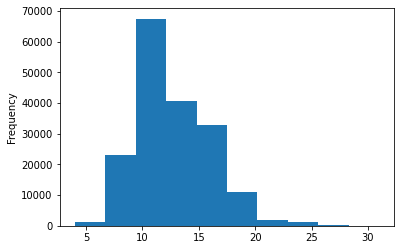

In [14]:
train_df.total_lines.plot.hist();

#Get list of sentences

In [15]:
train_sentences = train_df["text"].to_list()
val_sentences = val_df["text"].to_list()
test_sentences = test_df["text"].to_list()
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

Turning our labels into numbers

In [16]:
#one hot encode labels
from sklearn.preprocessing  import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
import tensorflow as tf
tf.constant(train_labels_one_hot)#turning array to tensors

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

Label encode labels

In [18]:
#extract labels("target" columns )and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [19]:
#get classes fro label encoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names


(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

#Building our baseline model

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#create a pipeline
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf", MultinomialNB())

])
model_0.fit(X = train_sentences, y = train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [21]:
model_0.score(X = val_sentences, y = val_labels_encoded)#finding the accuracy of our model

0.7218323844829869

In [22]:
baseline_pred = model_0.predict(val_sentences)
baseline_pred

array([4, 1, 3, ..., 4, 4, 1])

In [23]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=b5eed10779a459e5d8e287485163347dfbc297eec03e4087646a510a15428825
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


Predicting the accuracy, precision , recall , F1 score

In [24]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
def calculate_results(y_true,y_pred):
    """Calculates the accuracy, precision , Recall and F1 score of the predictions of our model"""
    accuracy = accuracy_score(y_true,y_pred)
    precision,recall,f1_score,_ = precision_recall_fscore_support(y_true, y_pred,average = "weighted")
    return {"accuracy":accuracy,"precision":precision,"recall":recall,"f1_score":f1_score}

In [25]:
baseline_results = calculate_results(y_true = val_labels_encoded, y_pred = baseline_pred)
baseline_results

{'accuracy': 0.7218323844829869,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1_score': 0.6989250353450294}

#Preparing our data(text) for deep sequence models

In [26]:
import numpy as np
from tensorflow.keras import layers


In [27]:
#How long an average sentence is:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
average_sent_lens = np.mean(sent_lens)
average_sent_lens

26.338269273494777

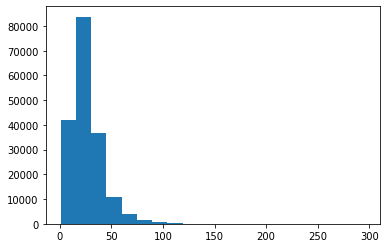

In [28]:
#What the distribution looks like
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins = 20);

In [29]:
#How long a sentence length covers the majority of examples
output_seq_len = int(np.percentile(sent_lens,95))
output_seq_len

55

In [30]:
#Maximum sequence length in training set
max(sent_lens)

296

#Creating a text vectorizer to map our tokens
Creating a layers which maps our texts from words to numbers

In [31]:
#how many word in our vocab
max_token = 68000
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [32]:
text_vectorizer = TextVectorization(max_tokens = max_token, output_sequence_length = output_seq_len)

In [33]:
#Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [34]:
#Test out text vectorizer on random sentences
import random
target_sentence = random.choice(train_sentences)
print(f"Random sentence:{target_sentence}")
print(f"Length of target sentence:{len(target_sentence.split())}")
text_vectorizer([target_sentence])

Random sentence:@ patients were randomised to intervention or comparison groups and @/@ consultations were tape-recorded .
Length of target sentence:15


<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[   12,     9,   210,     6,    38,    16,   421,    24,     3,
         4496,     9, 28227,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])>

In [35]:
#How many words in our training vocabulary
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"The most number of words:{len(rct_20k_text_vocab)}")
print(f"the most common words = {rct_20k_text_vocab[:5]}")
print(f"The 5 least common words = {rct_20k_text_vocab[-5:]}")

The most number of words:64841
the most common words = ['', '[UNK]', 'the', 'and', 'of']
The 5 least common words = ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [36]:
#get the config of text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

#Ceating a custom token embedding layer

In [37]:
token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab),
                               output_dim = 128, mask_zero = True,
                               name = "token_embedding"
)


In [38]:
print(f"Sentence before vectorization = \n{target_sentence}\n")
vectorized_sentence = text_vectorizer(target_sentence)
print(f"Vectorized sentence: \n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Embedde sentence \n{embedded_sentence}\n")
print(f"Shape of sentence:\n{embedded_sentence.shape}")

Sentence before vectorization = 
@ patients were randomised to intervention or comparison groups and @/@ consultations were tape-recorded .

Vectorized sentence: 
[   12     9   210     6    38    16   421    24     3  4496     9 28227
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]

Embedde sentence 
[[ 0.02960924  0.01097895  0.02247251 ... -0.03988066  0.03419534
  -0.02491689]
 [-0.0451553  -0.004956   -0.01392274 ...  0.01188727  0.0336432
  -0.01026473]
 [-0.00751263 -0.03022022 -0.04677368 ...  0.01510758 -0.04700559
   0.01573093]
 ...
 [-0.04037279 -0.03736659  0.00555557 ... -0.00109123 -0.02593573
  -0.02389667]
 [-0.04037279 -0.03736659  0.00555557 ... -0.00109123 -0.02593573
  -0.02389667]
 [-0.04037279 -0.03736659  0.00555557 ... -0.00109123 -0.02593573
  -0.02

#creating datasets(making sure our data loads as fast as possible)

In [39]:
#Turn our data into tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

In [40]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [41]:
#take tensor slice datasets and turn them into prefetch datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [42]:
train_labels_one_hot.shape,train_labels_one_hot[0]

((180040, 5), array([0., 0., 0., 1., 0.]))

#Model1:Conv 1D with token embeddings

In [43]:
#create 1d conv layer
input = layers.Input(shape = (1,), dtype= tf.string)
text_vector = text_vectorizer(input)
token_embeddings = token_embed(text_vector)
x = layers.Conv1D(64,kernel_size=  5,padding = "same", activation = "relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes,activation = "softmax")(x)
model_1 = tf.keras.Model(input,outputs,name = "model_1")

In [44]:
model_1.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325 

In [45]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [46]:
len(train_dataset)

5627

In [47]:
history_model1 = model_1.fit(train_dataset,steps_per_epoch = int(0.1*len(train_dataset)),epochs = 3, validation_data = valid_dataset, validation_steps = int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 15s 12ms/step - loss: 0.9254 - accuracy: 0.6335 - val_loss: 0.6937 - val_accuracy: 0.7380
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.6616 - accuracy: 0.7582 - val_loss: 0.6377 - val_accuracy: 0.7693
Epoch 3/3
562/562 [==============================] - 7s 13ms/step - loss: 0.6203 - accuracy: 0.7751 - val_loss: 0.5965 - val_accuracy: 0.7859


In [48]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5990 - accuracy: 0.7854


[0.5990362763404846, 0.7853832840919495]

In [49]:
model1_pred_probs = model_1.predict(valid_dataset)
model1_pred_probs

945/945 [==============================] - 2s 2ms/step


array([[4.4634566e-01, 1.7954682e-01, 8.5422732e-02, 2.6230022e-01,
        2.6384551e-02],
       [3.7868649e-01, 3.3337274e-01, 1.3263540e-02, 2.6527181e-01,
        9.4054639e-03],
       [1.2124491e-01, 1.0030658e-02, 1.3353730e-03, 8.6736780e-01,
        2.1213982e-05],
       ...,
       [5.3377757e-06, 1.0678297e-03, 5.4402521e-04, 1.9985168e-06,
        9.9838078e-01],
       [5.1737495e-02, 4.7262084e-01, 8.4894277e-02, 6.1423257e-02,
        3.2932419e-01],
       [2.1271020e-01, 6.1617255e-01, 3.8115054e-02, 5.8877390e-02,
        7.4124798e-02]], dtype=float32)

In [50]:
model1_preds = tf.argmax(model1_pred_probs, axis = 1)


In [51]:
model1_results = calculate_results(val_labels_encoded, model1_preds)
model1_results

{'accuracy': 0.7853832914073878,
 'precision': 0.7822622690812122,
 'recall': 0.7853832914073878,
 'f1_score': 0.7829048712091413}

Preparing  a pretrained embedding layer from tensorflow hub

#Model 2:Feature extraction with pretrained embeddings

In [52]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable = False, name = "Universal_sentence_encoder")

In [53]:
random_train_sentence = random.choice(train_sentences)
embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f"Random sentence:\n{random_train_sentence}\n")
print(f"Embedded sentence:\n{embedded_sentence}")

Random sentence:
all subjects received basiliximab induction , mycophenolate mofetil , and corticosteroids .

Embedded sentence:
[[-9.26618278e-03 -4.48685922e-02  6.63360730e-02  4.94485023e-03
  -3.72484550e-02  4.11450602e-02  6.20467365e-02 -5.54045960e-02
  -7.12100118e-02 -3.27083245e-02  4.71995883e-02  2.80401949e-02
  -2.76433770e-02  4.95103411e-02  1.62415542e-02 -6.54884577e-02
  -5.93348257e-02  7.74859264e-02 -4.60776910e-02 -5.00989370e-02
   4.06422216e-04  7.13756755e-02 -7.72805661e-02  7.66551718e-02
   1.66177619e-02  2.14719288e-02  2.72379015e-02 -9.09717083e-02
   7.87367020e-03  3.67587917e-02  4.86206040e-02  7.18642622e-02
   2.83332039e-02 -3.40813994e-02  1.82126078e-03  2.50856820e-02
  -7.73748383e-02 -7.12941289e-02  2.65297340e-03  4.02128473e-02
   6.41856417e-02 -2.69488455e-03  8.09647962e-02  5.89558184e-02
   5.33980355e-02  7.30993524e-02 -1.17509523e-02  1.86520778e-02
  -3.82578298e-02  1.64135229e-02 -3.84442694e-02  1.96756162e-02
  -5.84438369

In [54]:
inputs = layers.Input(shape = [],dtype = tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation = "relu")(pretrained_embedding)
#we can add more layers if we wanted to
outputs = layers.Dense(5, activation = "softmax")(x)
model_2 = tf.keras.Model(inputs,outputs,name = "model2_use_feature_extractor") 

In [55]:
model_2.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])


In [56]:
len(train_dataset)

5627

In [57]:
#fit model_2 to the data
hitory_model2 = model_2.fit(train_dataset,epochs = 3, steps_per_epoch = (int)(0.1*len(train_dataset)), validation_data = valid_dataset, validation_steps = (int)(0.1*len(valid_dataset)))


Epoch 1/3
562/562 [==============================] - 10s 13ms/step - loss: 0.9166 - accuracy: 0.6537 - val_loss: 0.7963 - val_accuracy: 0.6888
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7683 - accuracy: 0.7026 - val_loss: 0.7525 - val_accuracy: 0.7041
Epoch 3/3
562/562 [==============================] - 7s 13ms/step - loss: 0.7506 - accuracy: 0.7129 - val_loss: 0.7363 - val_accuracy: 0.7144


In [58]:
#evaluate on the whole validation dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 12s 12ms/step - loss: 0.7392 - accuracy: 0.7152


[0.7392075061798096, 0.7152456045150757]

In [59]:
model2_pred_probs = model_2.predict(valid_dataset)
model2_pred_probs

945/945 [==============================] - 10s 10ms/step


array([[0.44465327, 0.34271535, 0.0026224 , 0.20308578, 0.00692319],
       [0.33789724, 0.5332252 , 0.00384379, 0.1229249 , 0.00210892],
       [0.2208321 , 0.13493186, 0.01566574, 0.58860475, 0.0399655 ],
       ...,
       [0.00207226, 0.00656394, 0.0484589 , 0.00095035, 0.9419545 ],
       [0.00436296, 0.05512889, 0.18147811, 0.00180248, 0.7572276 ],
       [0.16238837, 0.26937217, 0.48780704, 0.01261266, 0.06781966]],
      dtype=float32)

In [60]:
model2_preds = tf.argmax(model2_pred_probs, axis = 1)
model2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [61]:
model2_results = calculate_results(val_labels_encoded, model2_preds)

In [62]:
model2_results

{'accuracy': 0.7152455977757183,
 'precision': 0.715266039209175,
 'recall': 0.7152455977757183,
 'f1_score': 0.7121199229343896}

#Creating a chracter level tokenizer with Tensorflow text vectorization layer

In [63]:
#We need to format our data at the character level
def split_chars(text):
  return " ".join(list(text))

In [64]:
split_chars(train_sentences[0])

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [65]:
#Split sequence level data splits to character level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [66]:
char_len = [len(sentences) for sentences in train_sentences]
mean_char_len = np.mean(char_len)
mean_char_len

149.3662574983337

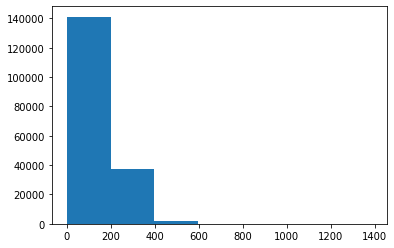

In [67]:
import matplotlib.pyplot as plt
plt.hist(char_len, bins = 7);

In [68]:
#Find what charcater length covers 95 percent of sequences
output_seq_char_len = int(np.percentile(char_len,95))
output_seq_char_len

290

In [69]:
#Get all keyboard characters
import string
alphabet = string.ascii_lowercase+string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
NUM_CHAR_TOKENS = len(alphabet) + 2
#Creating char level mtoken vectorization layer
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS, output_sequence_length = output_seq_char_len,standardize = "lower_and_strip_punctuation",name = "char_vectorizer")

In [71]:
char_vectorizer.adapt(train_chars)

In [72]:
char_vocab = char_vectorizer.get_vocabulary()

In [73]:
print(f"Number of different characters in our vocabulary is {len(char_vocab)}")
print(f"Five most common characters:{char_vocab[:5]}")

Number of different characters in our vocabulary is 28
Five most common characters:['', '[UNK]', 'e', 't', 'i']


In [74]:
random_chars = random.choice(train_chars)
vectorize_chars = char_vectorizer([random_chars])
print(f"Randomly selected character sequence : \n{random_chars}\n")
print(f"Vectorized_chars = \n{vectorize_chars}")

Randomly selected character sequence : 
p a r t i c i p a n t s   i n   t h e   i n t e r v e n t i o n   g r o u p   r e c e i v e d   t h r e e   i n d i v i d u a l i z e d   ,   s e l f - e f f i c a c y - e n h a n c i n g   s e s s i o n s   .

Vectorized_chars = 
[[14  5  8  3  4 11  4 14  5  6  3  9  4  6  3 13  2  4  6  3  2  8 21  2
   6  3  4  7  6 18  8  7 16 14  8  2 11  2  4 21  2 10  3 13  8  2  2  4
   6 10  4 21  4 10 16  5 12  4 25  2 10  9  2 12 17  2 17 17  4 11  5 11
  19  2  6 13  5  6 11  4  6 18  9  2  9  9  4  7  6  9  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

Creating a character level embedding layer

In [75]:
#creating char embedding layer
char_embed = layers.Embedding(input_dim = len(char_vocab), output_dim = 25,#This is the size of the char embedding in the paper
                                  mask_zero = True, name = "char_embed")



#Model 3: Conv1D model

In [76]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size = 5,padding = "same", activation = "relu")(char_embeddings)
x= layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)
model_3 = tf.keras.Model(inputs,outputs,name = "Model2_conv1D")

In [77]:
model_3.compile(loss=  "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

In [78]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [79]:
model3_history = model_3.fit(train_char_dataset,epochs = 3, steps_per_epoch = int(0.1*len(train_char_dataset)), validation_data = val_char_dataset,validation_steps = int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2497 - accuracy: 0.5021 - val_loss: 1.0301 - val_accuracy: 0.5868
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9997 - accuracy: 0.6019 - val_loss: 0.9406 - val_accuracy: 0.6287
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9314 - accuracy: 0.6307 - val_loss: 0.8681 - val_accuracy: 0.6632


In [80]:
model3_pred_probs = model_3.predict(val_char_dataset)
model3_pred_probs

945/945 [==============================] - 2s 2ms/step


array([[0.13475999, 0.29531056, 0.1065155 , 0.39277062, 0.07064341],
       [0.17178589, 0.6075771 , 0.02544078, 0.09946544, 0.09573078],
       [0.10235051, 0.34189582, 0.26986963, 0.21688081, 0.06900322],
       ...,
       [0.01105108, 0.03374524, 0.16656557, 0.01075489, 0.7778832 ],
       [0.0578608 , 0.351693  , 0.25974423, 0.08128212, 0.2494199 ],
       [0.5470179 , 0.22659472, 0.15046078, 0.06111922, 0.01480738]],
      dtype=float32)

In [81]:
model_preds = tf.argmax(model3_pred_probs, axis  =1)
model_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 1, ..., 4, 1, 0])>

In [82]:
model3_results = calculate_results(val_labels_encoded, model_preds)

In [83]:
model3_results

{'accuracy': 0.6509996028068317,
 'precision': 0.6458547541387365,
 'recall': 0.6509996028068317,
 'f1_score': 0.6414332448401318}

#Model 4: Building a multi input(token+charcter embedding) model

In [84]:
#Setup list of token inputs
token_inputs = layers.Input(shape = [], dtype = tf.string, name = "token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output=  layers.Dense(128, activation = "relu",name = "token_output")(token_embeddings)
token_model = tf.keras.Model(token_inputs,token_output)
#Set up char input model
char_inputs = layers.Input(shape = [], dtype = tf.string, name = "char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)#bi-LSTM shown in figure 1 of paper
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

In [85]:
#concatenate token and char inputs
token_char_concat = layers.Concatenate(name = "token_char_hybrid")([token_model.output,char_model.output])

In [86]:
#4 create output layers, adding in dropout
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation = "relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation = 'softmax', name = "output_layer")(final_dropout)
model_4 = tf.keras.Model([token_model.input,char_model.input],output_layer, name = "model4_token_amnd_char_embeddings")

In [87]:
model_4.summary()

Model: "model4_token_amnd_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 Universal_sentence_encoder (Ke  (None, 512)         256797824   [

Visualizing our data inputs

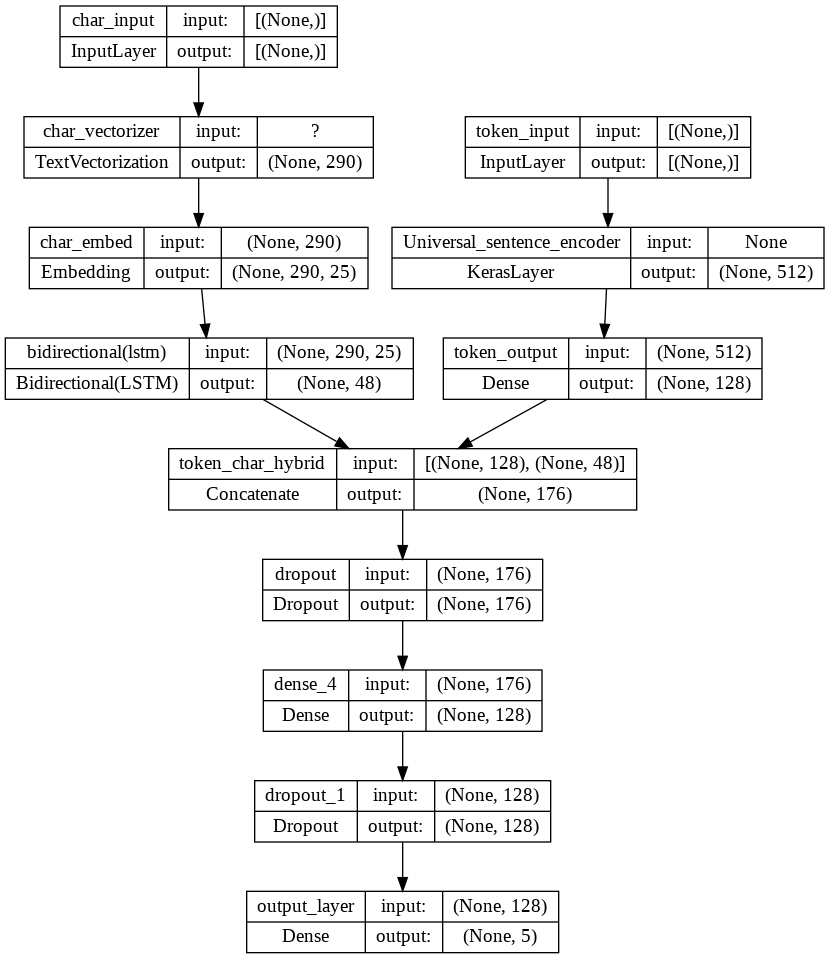

In [88]:
#Plot the model
from keras.utils import plot_model
plot_model(model_4,show_shapes = True)

In [89]:
#compile the model
model_4.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

#crafting multi nodel fast input data(combining token and character data)


In [90]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [91]:
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data,val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [92]:
train_char_token_dataset,val_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [93]:
#Fitting the model on token and character level sequences
history_model4 = model_4.fit(train_char_token_dataset,epochs = 3,
                             steps_per_epoch = int(0.1*len(train_char_token_dataset)),
                             validation_data = val_char_token_dataset,
                             validation_steps = int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 39s 53ms/step - loss: 0.9828 - accuracy: 0.6074 - val_loss: 0.7717 - val_accuracy: 0.7025
Epoch 2/3
562/562 [==============================] - 27s 47ms/step - loss: 0.7986 - accuracy: 0.6924 - val_loss: 0.7151 - val_accuracy: 0.7284
Epoch 3/3
562/562 [==============================] - 24s 43ms/step - loss: 0.7775 - accuracy: 0.7043 - val_loss: 0.6934 - val_accuracy: 0.7394


In [94]:
model_4.evaluate(val_char_token_dataset)


945/945 [==============================] - 22s 23ms/step - loss: 0.6995 - accuracy: 0.7348


[0.6995224356651306, 0.7347742915153503]

In [95]:
model4_pred_probs = model_4.predict(val_char_token_dataset)
model4_pred_probs

945/945 [==============================] - 24s 23ms/step


array([[4.3653047e-01, 3.2781097e-01, 3.6979665e-03, 2.2614647e-01,
        5.8141341e-03],
       [3.9153045e-01, 4.1819918e-01, 3.9109099e-03, 1.8443266e-01,
        1.9268310e-03],
       [3.2853073e-01, 2.0169203e-01, 4.3624174e-02, 3.8852239e-01,
        3.7630718e-02],
       ...,
       [5.7189877e-04, 8.3057247e-03, 5.9606437e-02, 1.8800104e-04,
        9.3132800e-01],
       [8.5915215e-03, 8.0121741e-02, 2.2834711e-01, 3.8855365e-03,
        6.7905408e-01],
       [2.6486537e-01, 3.7545946e-01, 2.8105548e-01, 3.5369862e-02,
        4.3249812e-02]], dtype=float32)

In [96]:
model4_preds = tf.argmax(model4_pred_probs, axis = 1)
model4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [97]:
model4_results = calculate_results(val_labels_encoded,model4_preds)
model4_results

{'accuracy': 0.7347742618826956,
 'precision': 0.7361643827959797,
 'recall': 0.7347742618826956,
 'f1_score': 0.7332741251246219}

#Model 5 :Adding positional embeddings via feature engineering

Any engineered feature used to train a model need to be available at test time , in our case, line numbers and total lines are vailbale

In [98]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

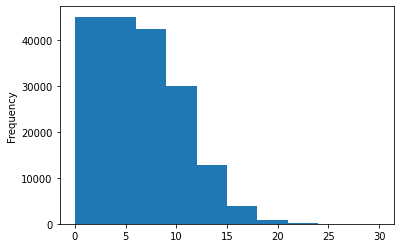

In [99]:
#check distribution of line number column
train_df.line_number.plot.hist()

In [100]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth = 15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth = 15)
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:10]

(TensorShape([180040, 15]), <tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>)

In [101]:
train_df["total_lines"].value_counts()

12    24468
11    23639
13    22113
10    19400
14    18438
15    14610
9     12285
16    10768
8      7464
17     7429
18     5202
7      3353
19     3344
20     2480
21     1281
6      1146
22      770
23      759
24      264
5       215
25      200
26      182
27       81
29       58
4        32
31       31
28       28
Name: total_lines, dtype: int64

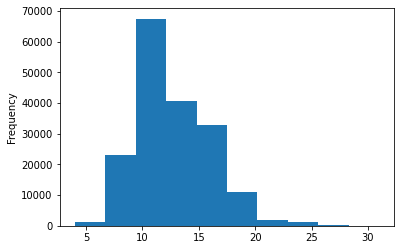

In [102]:
train_df.total_lines.plot.hist()

In [103]:
np.percentile(train_df.total_lines,98)

21.0

In [104]:
#use tensorflow to create one-hot-encoded feature
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth = 20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth = 20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth = 20)
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

In [105]:
#Building foundations of tribrid embedding model
token_inputs = layers.Input(shape = [],dtype = tf.string,name = "token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation = "relu", name = "output_model")(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs)
#2. char inputs
char_inputs = layers.Input(shape = (1,), dtype = tf.string,name = "char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

In [106]:
train_line_numbers_one_hot[0].shape

TensorShape([15])

In [107]:
line_number_inputs = layers.Input(shape = (15,), dtype = tf.float32,name = "line_number_input")
x= layers.Dense(32, activation = "relu")(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs,x)

In [108]:
total_lines_input = layers.Input(shape = (20,),dtype = tf.float32,name = "total_lines_input")
y = layers.Dense(32, activation = "relu")(total_lines_input)
total_line_model = tf.keras.Model(total_lines_input,y)

In [109]:
#combine token and char embeddings 
combined_embeddings = layers.Concatenate(name = "cahr_token_hybrid_embedding")([token_model.output,char_model.output])
z= layers.Dense(128, activation = "relu")(combined_embeddings)
z= layers.Dropout(0.5)(z)
tribrid_embeddings = layers.Concatenate(name = "char_token_tribrid")([line_number_model.output, total_line_model.output, z])

In [110]:
output_layer = layers.Dense(5, activation = "softmax",name = "output_layer")(tribrid_embeddings)
model_5 = tf.keras.Model([line_number_model.input,total_line_model.input
                          ,token_model.input,char_model.input],output_layer,name = "tribrid_embedding_model")

In [111]:
model_5.summary()

Model: "tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 Universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inp

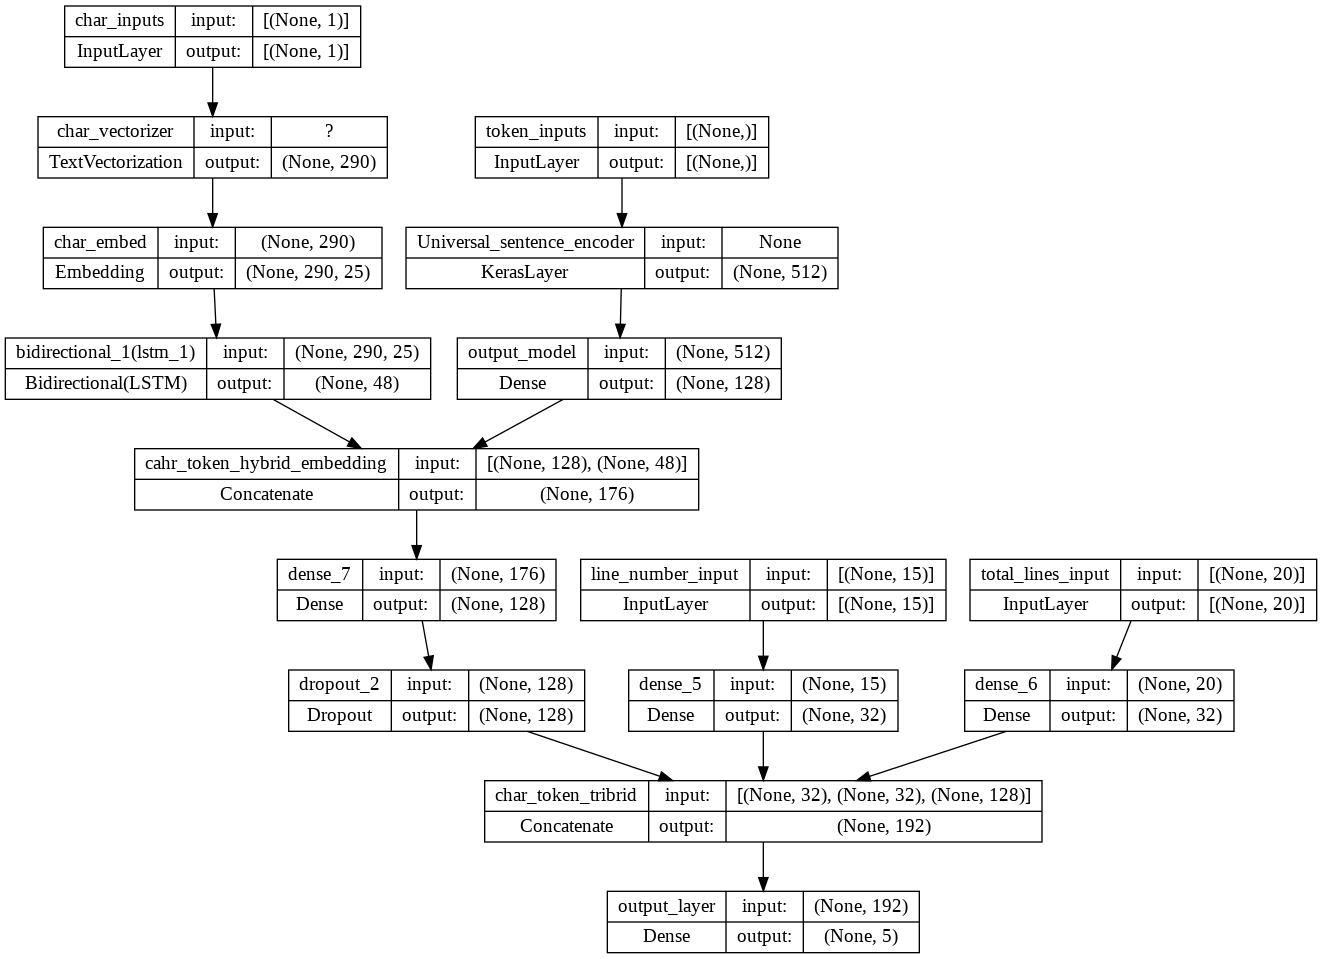

In [112]:
#Visualizing our model
plot_model(model_5, show_shapes = True)

In [113]:
model_5.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),#helps to prevent over-fitting
                optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

Creating tribid embeddings dataset

In [114]:
#Create training and validation datsets
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,train_total_lines_one_hot, train_sentences,train_chars))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [115]:
val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,val_total_lines_one_hot, val_sentences,val_chars))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data,val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [116]:
#check input shapes
train_char_token_pos_dataset,val_char_token_pos_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [117]:
#fitting our dataset
history_model5 = model_5.fit(train_char_token_pos_dataset,epochs = 3, steps_per_epoch = int(0.1*len(train_char_token_pos_dataset)), 
                             validation_data =val_char_token_pos_dataset, validation_steps = int(0.1*len(val_char_token_pos_dataset)) )

Epoch 1/3
562/562 [==============================] - 39s 55ms/step - loss: 1.1060 - accuracy: 0.7199 - val_loss: 0.9876 - val_accuracy: 0.8042
Epoch 2/3
562/562 [==============================] - 27s 49ms/step - loss: 0.9761 - accuracy: 0.8116 - val_loss: 0.9514 - val_accuracy: 0.8248
Epoch 3/3
562/562 [==============================] - 26s 46ms/step - loss: 0.9570 - accuracy: 0.8199 - val_loss: 0.9402 - val_accuracy: 0.8314


In [118]:
model5_pred_probs = model_5.predict(val_char_token_pos_dataset, verbose = 1)
model5_pred_probs

945/945 [==============================] - 24s 22ms/step


array([[0.50623983, 0.1025921 , 0.01207319, 0.35928383, 0.01981104],
       [0.48067984, 0.10543113, 0.05000105, 0.35099214, 0.0128958 ],
       [0.2792104 , 0.127045  , 0.13094008, 0.4083536 , 0.05445094],
       ...,
       [0.03491001, 0.10039233, 0.04237046, 0.02856019, 0.79376704],
       [0.0339423 , 0.31167686, 0.08002356, 0.03180297, 0.5425543 ],
       [0.14831734, 0.6263233 , 0.12154956, 0.03340843, 0.07040142]],
      dtype=float32)

In [119]:
model5_preds = tf.argmax(model5_pred_probs, axis = 1)
model5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [120]:
model5_results = calculate_results(val_labels_encoded,model5_preds)
model5_results

{'accuracy': 0.8323513835562029,
 'precision': 0.8312957260371513,
 'recall': 0.8323513835562029,
 'f1_score': 0.8316634464285197}

#Comparing performance of our all modelling experiments

In [134]:
all_model_results = pd.DataFrame({"model_0_baseline":baseline_results,
                                  "model_1_custom_token_embedding":model1_results,
                                  "model_2_pretrained_token_embedding":model2_results,
                                  "model_3_custom_char_embedding":model3_results,
                                  "model_4_hybrid_char_token_embedding":model4_results,
                                  "model5_pos_char_token_embedding":model5_results}).T
all_model_results

,accuracy,precision,recall,f1_score
model_0_baseline,0.721832,0.718647,0.721832,0.698925
model_1_custom_token_embedding,0.785383,0.782262,0.785383,0.782905
model_2_pretrained_token_embedding,0.715246,0.715266,0.715246,0.712120
model_3_custom_char_embedding,0.651000,0.645855,0.651000,0.641433
model_4_hybrid_char_token_embedding,0.734774,0.736164,0.734774,0.733274
model5_pos_char_token_embedding,0.832351,0.831296,0.832351,0.831663


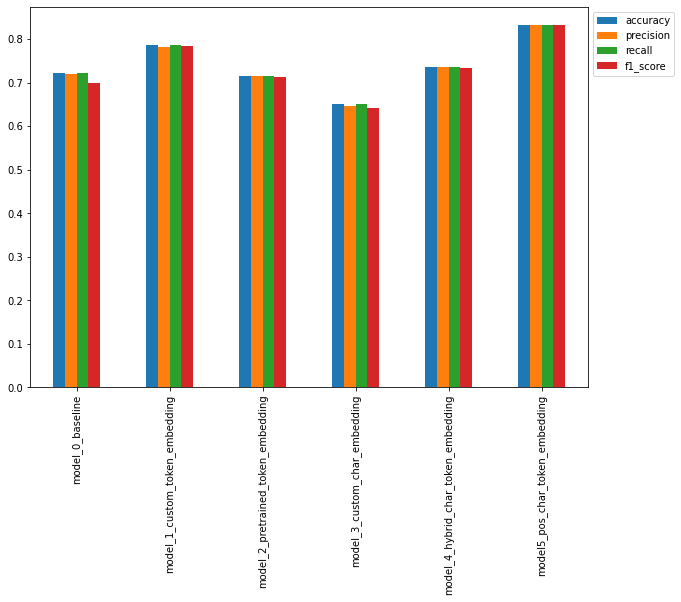

In [135]:
all_model_results.plot(kind = "bar",figsize = (10,7)).legend(bbox_to_anchor = (1.0,1.0));

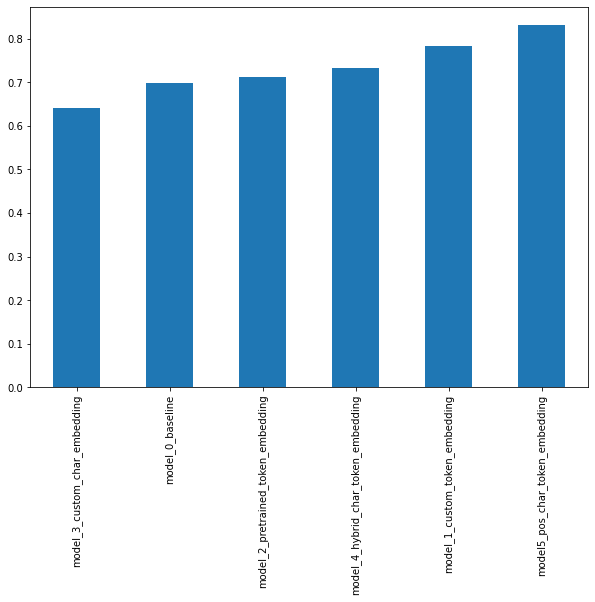

In [136]:
all_model_results.sort_values("f1_score",ascending = True)["f1_score"].plot(kind = "bar",figsize = (10,7));

In [130]:
#Saving our best model and loading it again
model_5.save("skimlit_tribrid_model")
#load in best performing model
loaded_model = tf.keras.models.load_model("/content/skimlit_tribrid_model")

In [131]:
loaded_pred_probs = loaded_model.predict(val_char_token_pos_dataset)
loaded_pred = tf.argmax(loaded_pred_probs, axis = 1)
loaded_model_results = calculate_results(val_labels_encoded, loaded_pred)
loaded_model_results

945/945 [==============================] - 25s 24ms/step


{'accuracy': 0.8323513835562029,
 'precision': 0.8312957260371513,
 'recall': 0.8323513835562029,
 'f1_score': 0.8316634464285197}